<a href="https://colab.research.google.com/github/Locke0/sales-prediction/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

filename = '/content/drive/MyDrive/Coding Dojo/Data/sales_predictions.csv'

df = pd.read_csv(filename)
# df.info()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [64]:
# data cleaning
# sorting data

# filling missing data 
df['Item_Weight'] = df.loc[:, 'Item_Weight'].interpolate(method = 'linear')
df['Outlet_Size'] = df.loc[:, 'Outlet_Size'].interpolate(method = 'ffill')

df['Item_Fat_Content'].replace('LF','Low Fat', inplace = True)
df['Item_Fat_Content'].replace('low fat','Low Fat', inplace = True)
df['Item_Fat_Content'].replace('reg','Regular', inplace = True)
# df.drop_duplicates(keep = 'first', inplace = False)
# df.fillna(value=0, inplace=True)
df.info()
df.duplicated().value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


False    8523
dtype: int64

## Data Visualization

Item Outlet Sales in Terms of Type

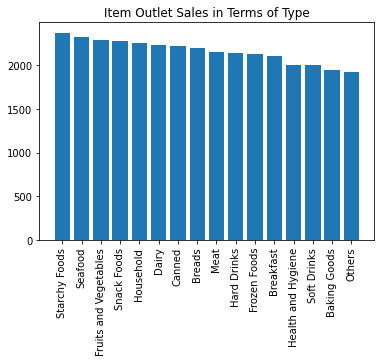

In [65]:
# data visualization
df_ItemType = df.groupby(['Item_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending = False).head(20)
df_ItemType

plt.bar(df_ItemType.index, df_ItemType.values)

plt.title('Item Outlet Sales in Terms of Type')
plt.xticks(rotation=90);

Histograms


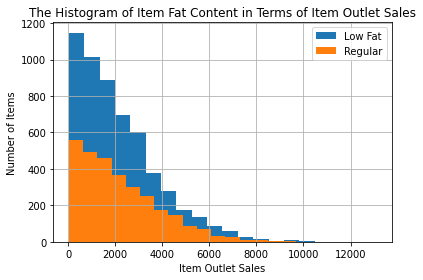

In [66]:
# Histograms
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].hist(legend = True, bins = 20);
plt.title('The Histogram of Item Fat Content in Terms of Item Outlet Sales')
plt.ylabel('Number of Items')
plt.xlabel('Item Outlet Sales')
plt.tight_layout()
# it shows that the low fat items has higher sales.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


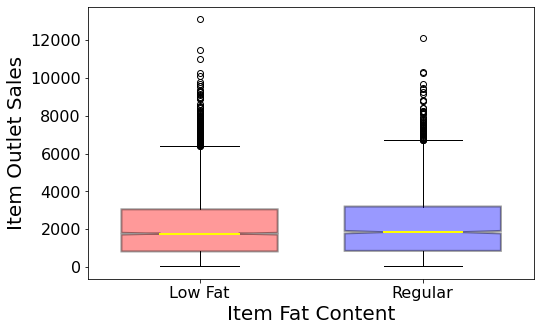

In [67]:
#Boxplot
low_fat = df.loc[df['Item_Fat_Content']=='Low Fat','Item_Outlet_Sales']
high_fat = df.loc[df['Item_Fat_Content']=='Regular','Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([low_fat,high_fat],
           notch = True,
           labels=['Low Fat', 'Regular'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Item Fat Content', fontsize = 20);
plt.ylabel('Item Outlet Sales', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

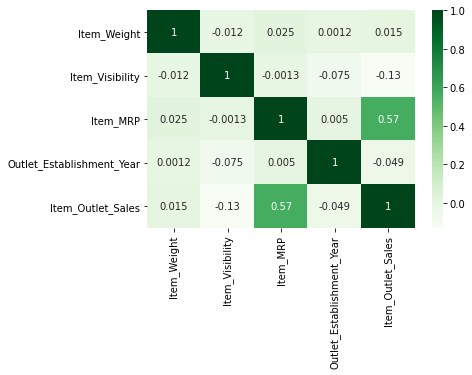

In [68]:
# Heatmap
corr = df.corr()
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens', annot = True)

##KNN Predictions

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [70]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [71]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [72]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1})


In [73]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [74]:
# pandas get dummies
ohe_df = pd.get_dummies(df, columns = ['Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first = True)
ohe_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1999,3735.1380,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.92,1,0.019278,48.2692,OUT018,2009,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1999,2097.2700,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.20,1,0.000000,182.0950,OUT010,1998,732.3800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,NCD19,8.93,0,0.000000,53.8614,OUT013,1987,994.7052,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [75]:
# Split data into target vector and features matrix
X = ohe_df.drop(columns = ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = ohe_df['Item_Outlet_Sales']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [77]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
len(X_train)

6392

In [114]:
# KNN
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print('')

RSME = np.sqrt(mean_squared_error(y_pred,y_test))
print(RSME)
knn.score(X_test,y_test)

[1571.45445    1332.43225    1403.61736667 ... 2198.52708333 1991.4078
 2476.94245   ]

1202.2196980371232


0.47613479504302514

#Evaluation
When k is set to 12 in the KNN regression, the predictions have the highest accuracy.

Item_MRP is most associated with Item_Outlet_Sales according to the correlation heatmap.
